In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

#import sys
#sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
#from evalutation.plotting.plotting import PLOTTER
#from data_prep.data_preparation import DATA_PREP
#from data_loader.lfp_loader import LFP_LOADER

In [2]:
dp = DATA_PREP()

/home/rachel/Documents/lfp2spikes/modularized_code


In [2]:
path_lfp = "Documents/lfp2spikes/modularized_code/data/lfp_data/p66_lfps_notch50_zscore.csv"#../data/lfp_data/p66_lfps_notch50_zscore.csv"
#path_spikes = "/home/rachel/Documents/lfp2spikes/code/data_prep/data/prepro_data/pat66_spikes_df_prepro.csv"
path_spikes = "../data/spikes_data/p66_spikes_bin1ms.csv"

df_lfps = pd.read_pickle(path_lfp)
df_spikes = pd.read_pickle(path_spikes)

FileNotFoundError: [Errno 2] No such file or directory: 'Documents/lfp2spikes/modularized_code/data/lfp_data/p66_lfps_notch50_zscore.csv'

In [4]:
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored
0,66,1,1,"[87.43982571348546, 89.84766536594209, 90.3204...","[117413594184.0, 117413595184.00008, 117413596...",LA1,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-24.47657218848258, -22.39801085368898, -12.1...","[-24.16946400748021, -22.830642924634162, -13....","[-0.1634750409223574, -0.15459605837772247, -0..."


In [5]:
df_spikes.head(1)

,patient_id,session_nr,unit_id,spike_times,spike_movie_timestamps,bin1_cnt
0,66,1,0,"[117413938.78849219, 117414170.5094629, 117414...","[118858104.90968946, 118858554.3420625, 118859...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
selected_channels = None#[5, 6, 9, 10, 11, 12, 13, 16, 36, 40, 57, 58, 59, 60, 61, 63, 64, 79, 80]
bin_size=1
SUA=True
MUA=False
origin="zscored"

In [7]:
df_lfps, df_spikes = dp.compress_dataset(
    df_lfps, 
    df_spikes,
    bin_size,
    use_S_spikes=SUA, 
    use_M_spikes=MUA, 
    selected_channels=selected_channels
)
print(f"Data combined for channels: {selected_channels}")

Data combined for channels: None


In [8]:
import numpy as np 

df_lfps[f"sta_idx{bin_size}"] = df_spikes.apply(
    #lambda x : np.where(x[f"bin{bin_size}_cnt"] == 1)[0]
    lambda x : np.where(x[f"bin{bin_size}_cnt"] > 0)[0]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111..."


In [9]:
interval = 100
source_sta = f"{origin}" # "zscored"
#spike_idx = np.where(df_spikes[f"STA_bin{bin_size}_cnt"][0] == 1)[0]

df_lfps[f"STA_spike_bs_int{interval}_{source_sta}"] = df_lfps.apply(
    lambda x :
        x[source_sta][np.array(
            #[i
            [np.arange(i-interval, i+interval+1, 1) 
             for i in x[f"sta_idx{bin_size}"]
            #]
             if i+1+interval<len(x[source_sta])]
        )]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75..."


In [118]:
df_lfps[f"STA"][:3]

0    [1.5284969638855155, 1.26247530415791, 1.40188...
1    [-8.175464225989044, -8.150268677738282, -8.14...
2    [-25.978061437987996, -25.684995014929697, -25...
Name: STA, dtype: object

In [10]:
df_lfps[f"STA"] = df_lfps[f"STA_spike_bs_int{interval}_{source_sta}"].apply(
    lambda x :
        x.transpose().mean(axis=1)
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0..."


In [11]:
df_lfps.head()

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0..."
1,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[25, 305, 407, 525, 717, 1268, 1642, 2030, 362...","[[-0.11481998967552032, -0.04580879604974285, ...","[-0.05534560141633152, -0.055174154984653986, ..."
2,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[9818, 10340, 15449, 41657, 41665, 45856, 5436...","[[0.44664302668387984, 0.466586834161785, 0.48...","[-0.17648572252879732, -0.17449151339400018, -..."
3,66,1,6,"[25.59270535939594, 35.15944332216233, 33.2630...","[117413594184.0, 117413595184.00008, 117413596...",LA6,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-44.80310285788151, -43.69585071676279, -36.1...","[-43.96377679877102, -43.23909546845612, -36.1...","[-0.32477453271064993, -0.3194312698036126, -0...","[4166, 4371, 9264, 13158, 14589, 15972, 16784,...","[[0.3884373325402356, 0.36719004885490675, 0.3...","[0.06036253074196002, 0.0610398282460443, 0.06..."
4,66,1,9,"[-86.85279127296586, -83.1329683847488, -85.94...","[117413594184.0, 117413595184.00008, 117413596...",LAH1,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-102.83705687351363, -108.06162989837553, -11...","[-101.39155102490356, -106.64061197713981, -11...","[-0.7220849221170786, -0.7594109059537251, -0....","[4660, 23046, 23312, 31905, 43864, 45945, 7422...","[[1.0737986139714357, 1.1226164510606145, 1.12...","[0.07052498383006257, 0.06593957687619185, 0.0..."


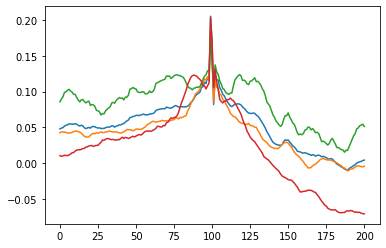

In [12]:
plt.plot(df_lfps[f"STA"][8:11].to_numpy().mean(axis=0))
plt.plot(df_lfps[f"STA"][8])
plt.plot(df_lfps[f"STA"][10])
plt.plot(df_lfps[f"STA"][11])

<AxesSubplot:xlabel='time before spike (ms)', ylabel='STA'>

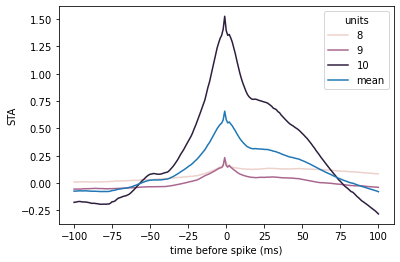

In [15]:
df_STA = pd.DataFrame({
    "STA" : np.array(df_lfps[f"STA"][:3].values.tolist()).flatten(), 
    "units" : np.repeat(df_spikes.unit_id.to_numpy()[:3], interval*2+1), 
    "time before spike (ms)" : np.array((list(map(operator.neg, reversed(range(1,interval+1)))) + list(range(interval+1)))*3) #len(df_spikes.unit_i)
})
sns.lineplot(data=df_STA, x="time before spike (ms)", y="STA", hue="units")

df_STA_mean = pd.DataFrame({
    "STA" : df_lfps[f"STA"][:3].to_numpy().mean(axis=0), 
    "units" : np.repeat(np.array("mean"), interval*2+1), 
    "time before spike (ms)" : np.array((list(map(operator.neg, reversed(range(1,interval+1)))) + list(range(interval+1)))) #len(df_spikes.unit_i)
})
sns.lineplot(data=df_STA_mean, x="time before spike (ms)", y="STA", hue="units")


In [246]:
import matplotlib
class PLOTTER(): 
    
    def __init__(self):
        
        ### define colors ##
        self.blue2    = "#2e518c"
        self.blue3    = "#5079b3"
        self.blue4    = "#7da7d9"
        self.green1   = "#146614"
        self.green2   = "#2e8c2e"
        self.green3   = "#50b350"
        self.green4   = "#7dd97d"
        self.green5   = "#b3ffb3"
        self.red1     = "#660000"
        self.red2     = "#8c1919"
        self.red3     = "#b33e3e"
        self.red4     = "#d97272"
        self.red5     = "#ffb3b3"
        self.magenta1 = "#581466"
        self.magenta2 = "#762e8c"
        self.magenta3 = "#9650b3"
        self.magenta4 = "#b87dd9"
        self.magenta5 = "#dfb3ff"
        self.orange1  = "#b34e0b"
        self.orange2  = "#c67322"
        self.orange3  = "#d99a3d"
        self.orange4  = "#ecc05c"
        self.orange5  = "#ffe480"
        self.cyan1    = "#146666"
        self.cyan2    = "#2e8c8c"
        self.cyan3    = "#50b3b3"
        self.cyan4    = "#7dd9d9"
        self.cyan5    = "#b3ffff"
        self.gray1    = "#4d4d4d"
        self.gray2    = "#6c6c6c"
        self.gray3    = "#8c8c8c"
        self.gray4    = "#acacac"
        self.gray5    = "#cccccc"
        
        palette = "viridis"
        sns.set_palette(palette)
        
        # Plot customizations
        self.tic_font_size = "x-small"
        self.label_font_size = "small"

        self.rc = {
            "figure.figsize":(10.75, 3.75),
            "font.family":"sans serif", 
            "text.usetex":False,
            "xtick.labelsize":self.tic_font_size,
            "ytick.labelsize":self.tic_font_size,
            "axes.axisbelow":True,
            "lines.linewidth":0.8, 
            "legend.fancybox":True, 
            # "text.usetex" : True, 
            # "pdf.fonttype" : 42
        }

        matplotlib.rcParams["lines.linewidth"] = 0.8
        matplotlib.rcParams["legend.fancybox"] = True
        # matplotlib.rcParams["pdf.fonttype"] = 42
        # matplotlib.rcParams["ps.fonttype"] = 42

        # matplotlib.rcParams["text.usetex"] = True

        sns.set(rc=self.rc)
        sns.set_style('white')

        plt.tight_layout()
        
    
    
    def plot_best_theta_with_STA(
        self, 
        theta_df, 
        channels,
        best_values       
    ):
        
        ## set up frame for data ##
        rows = 5
        cols = 4
        fig, axs = plt.subplots(rows, cols, figsize=(12, 7))
        
        x_label = "time before spike [$ms$]"
        y_label = "weight values"

        csc_set = list(set(channels))
        n_csc = len(csc_set)

        for i in range(n_csc): 

            k = i // 4
            j = i % 4

            ## fig prep ##
            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )

            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            c = csc_set[i]
        
            x_c = theta_df.iloc[np.array(theta_df.channel==c)]
            xs_u = []
            for u in set(x_c.unit.tolist()):
                l, alpha = best_values[f"{u}"]
                x_u = x_c.iloc[np.array(x_c.unit==u)]
                x_u = x_u.iloc[np.array(x_u.alpha==alpha)]
                x_u = x_u.iloc[np.array(x_u.regularization==f"L{l+1}")]
                xs_u.append(x_u)
            xs = pd.concat(xs_u)
            sns.lineplot(ax=axs[k,j], data=xs, y=y_label, x=x_label, hue="unit", palette="dark:salmon_r")


            axs[k,j].set_title(f"channel {c}", fontsize=self.label_font_size)
            handles, labels = axs[k,j].get_legend_handles_labels()
            axs[k,j].legend(
                handles=handles, labels=labels, 
                title="units", title_fontsize=self.label_font_size,
                fontsize=self.tic_font_size, 
                loc="upper left", bbox_to_anchor=(1.02,1.09)
            ) 
            
        plt.subplots_adjust(hspace=0.9, wspace=0.95)
        
        return fig, axs
    

        
    
    def plot_STA(
        self, 
        lfps, 
        spikes,
        interval        
    ):
        
        ## set up frame for data ##
        fig, axs = plt.subplots(5, 4, figsize=(12, 7))
        
        x_label = "time around spike [$ms$]"
        y_label = "STA"
        
        #fig.suptitle("STAs for different channels with 100ms before and after", fontweight='bold', fontsize=30)
        #fig.supxlabel('STA interval', fontweight='light', fontsize=20)
        #fig.supylabel('mean voltage', fontweight='light', fontsize=20)
        #fig, axs = plt.subplots(4, 2, figsize=(20, 10))
        #for i in range(len(df_lfps[f"STA_int{intervall}"])): 
        for i in range(20): 
                
            k = i // 4
            j = i % 4
        
            ## fig prep ##
            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )
            
            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            c = list(set(lfps.csc_nr.tolist()))[i]

            c_idx = np.where(lfps.csc_nr == c)[0]
        
            df_STA = pd.DataFrame({
                y_label : np.array(lfps[y_label][c_idx].values.tolist()).flatten(), 
                "units" : np.repeat(spikes.unit_id.to_numpy()[c_idx], interval*2+1), 
                x_label : np.array(
                    (list(
                        map(
                            operator.neg, 
                            reversed(range(1,interval+1))
                        )
                    ) 
                     + list(range(interval+1)))

                    * c_idx.size) 
            })
            colors = sns.color_palette([self.red1, self.red2, self.red3, self.red4])
            #sns.set_palette(sns.color_palette(colors))
            sns.lineplot(ax=axs[k,j], data=df_STA, x=x_label, y=y_label, hue="units", 
                        palette="dark:salmon_r")

            if c_idx.size>1:
                df_STA_mean = pd.DataFrame({
                    y_label : df_lfps[y_label][c_idx].to_numpy().mean(axis=0), 
                    "units" : np.repeat(np.array("mean"), interval*2+1), 
                    x_label : np.array(
                        (list
                         (map(
                             operator.neg, 
                             reversed(range(1,interval+1))
                         )) 
                         + list(range(interval+1)))) #len(df_spikes.unit_i)
                })
                
                colors = [self.gray4]
                sns.set_palette(sns.color_palette(colors))
                sns.lineplot(ax=axs[k,j], data=df_STA_mean, x=x_label, y=y_label, hue="units")

            axs[k,j].set_title(f"channel {c}", fontsize=self.label_font_size)
            handles, labels = axs[k,j].get_legend_handles_labels()
            axs[k,j].legend(
                handles=handles, labels=labels, 
                title="units", title_fontsize=self.label_font_size,
                fontsize=self.tic_font_size, 
                loc="upper left", bbox_to_anchor=(1.02,1.09)
            ) 

        plt.subplots_adjust(hspace=0.9, wspace=0.95)
        
        return fig


<Figure size 774x270 with 0 Axes>

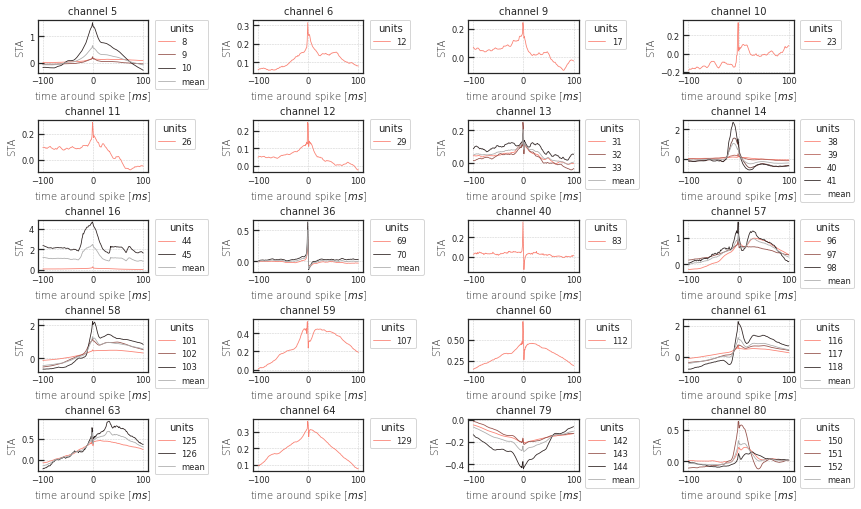

In [247]:
pltr = PLOTTER()
figSTA = pltr.plot_STA(
    df_lfps, 
    df_spikes, 
    interval
)
plt.subplots_adjust(
    left=0.04, right=0.915, bottom=0.065, top=0.96, 
)
figSTA.savefig('plots/STA.png')
figSTA.savefig('plots/STA.pdf')

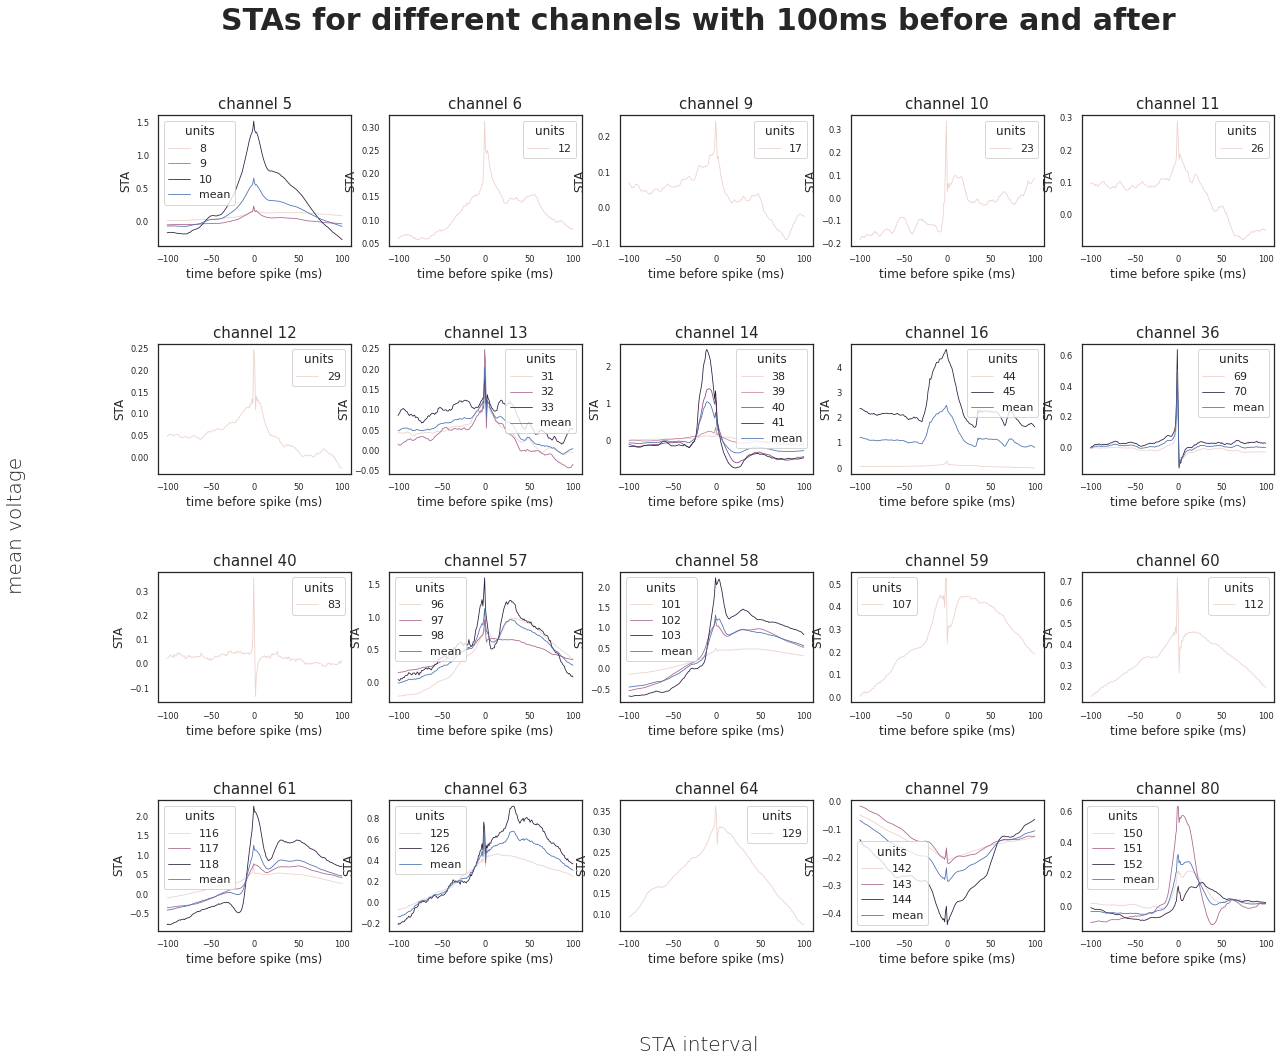

In [153]:
fig, axs = plt.subplots(4, 5, figsize=(20, 15))
fig.suptitle("STAs for different channels with 100ms before and after", fontweight='bold', fontsize=30)
fig.supxlabel('STA interval', fontweight='light', fontsize=20)
fig.supylabel('mean voltage', fontweight='light', fontsize=20)
#fig, axs = plt.subplots(4, 2, figsize=(20, 10))
#for i in range(len(df_lfps[f"STA_int{intervall}"])): 
for i in range(20): 
    k = i // 5
    j = i % 5
    
    c = list(set(df_lfps.csc_nr.tolist()))[i]
    
    c_idx = np.where(df_lfps.csc_nr == c)[0]
    
    df_STA = pd.DataFrame({
        "STA" : np.array(df_lfps[f"STA"][c_idx].values.tolist()).flatten(), 
        "units" : np.repeat(df_spikes.unit_id.to_numpy()[c_idx], interval*2+1), 
        "time before spike (ms)" : np.array(
            (list(
                map(
                    operator.neg, 
                    reversed(range(1,interval+1))
                )
            ) 
             + list(range(interval+1)))
            
            * c_idx.size) 
    })
    sns.lineplot(ax=axs[k,j], data=df_STA, x="time before spike (ms)", y="STA", hue="units")
    
    if c_idx.size>1:
        df_STA_mean = pd.DataFrame({
            "STA" : df_lfps[f"STA"][c_idx].to_numpy().mean(axis=0), 
            "units" : np.repeat(np.array("mean"), interval*2+1), 
            "time before spike (ms)" : np.array(
                (list
                 (map(
                     operator.neg, 
                     reversed(range(1,interval+1))
                 )) 
                 + list(range(interval+1)))) #len(df_spikes.unit_i)
        })
        sns.lineplot(ax=axs[k,j], data=df_STA_mean, x="time before spike (ms)", y="STA", hue="units")
    
    axs[k,j].set_title(f"channel {c}", fontsize=15)
    
plt.subplots_adjust(hspace=0.75)

plt.show()


<AxesSubplot:xlabel='time before spike (ms)', ylabel='STA'>

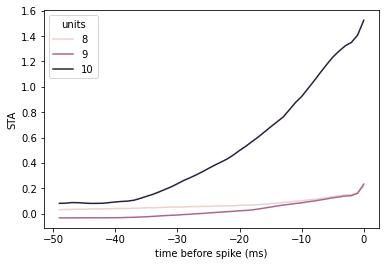

In [72]:
sns.lineplot(data=df_STA, x="time before spike (ms)", y="STA", hue="units")

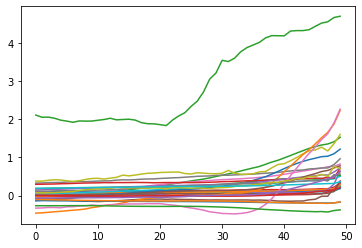

In [29]:
import matplotlib.pyplot as plt
for i in range(35):
    plt.plot(df_lfps[f"STA_spike_int{interval}_{source_sta}"][i].transpose().mean(axis=1))
plt.show()